In [1]:
import pandas as pd
import numpy as np
import re
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
# Gensim
import gensim
from gensim.utils import simple_preprocess
# NLTK
import nltk
import glob
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thanigav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
path = ('./data_collection_2/*.csv')
print(f"Finding files from {path}.......\n")
files = glob.glob(path)

# Call Preprocess and tree build function for each file
# for file_i, file in enumerate(files):
#     print(f'{file} is getting processed')
data_frames = [pd.read_csv(file) for file_i, file in enumerate(files)]
df = pd.concat(data_frames, ignore_index=True, sort=False)
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
df.head()

Finding files from ./data_collection_2/*.csv.......



,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities,withheld_scope,withheld_in_countries,Hashtag
0,Mon Dec 05 14:14:43 +0000 2022,1599769240004972544,1599769240004972544,RT @iot_automotive: 24h round-up. A collection...,False,"{'hashtags': [{'text': 'AI', 'indices': [95, 9...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,autonomousvehicles
1,Mon Dec 05 14:00:55 +0000 2022,1599765764113940483,1599765764113940483,Meet Powderworld: A Lightweight Simulation Env...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://buffer.com"" rel=""nofollow"">Bu...",NaN,NaN,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,autonomousvehicles
2,Mon Dec 05 14:00:04 +0000 2022,1599765552154775557,1599765552154775557,RT @GothamVirtual: #vr #vrgotham #3dvideomotio...,False,"{'hashtags': [{'text': 'vr', 'indices': [19, 2...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://robotconsumer.com/"" rel=""nofol...",NaN,NaN,...,False,NaN,en,1.599754e+18,1.599754e+18,NaN,NaN,NaN,NaN,autonomousvehicles
3,Mon Dec 05 14:00:04 +0000 2022,1599765551378845697,1599765551378845697,RT @lidarnews: This research paper investigate...,False,"{'hashtags': [{'text': 'lidar', 'indices': [74...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://robotconsumer.com/"" rel=""nofol...",NaN,NaN,...,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,autonomousvehicles
4,Mon Dec 05 14:00:04 +0000 2022,1599765550544130048,1599765550544130048,RT @guidaautonoma: American drivers are more l...,False,"{'hashtags': [{'text': 'autonomous', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://robotconsumer.com/"" rel=""nofol...",NaN,NaN,...,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,autonomousvehicles


In [3]:
df.reset_index()

,index,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities,withheld_scope,withheld_in_countries,Hashtag
0,0,Mon Dec 05 14:14:43 +0000 2022,1599769240004972544,1599769240004972544,RT @iot_automotive: 24h round-up. A collection...,False,"{'hashtags': [{'text': 'AI', 'indices': [95, 9...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://about.twitter.com/products/tw...",NaN,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,autonomousvehicles
1,1,Mon Dec 05 14:00:55 +0000 2022,1599765764113940483,1599765764113940483,Meet Powderworld: A Lightweight Simulation Env...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://buffer.com"" rel=""nofollow"">Bu...",NaN,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,autonomousvehicles
2,2,Mon Dec 05 14:00:04 +0000 2022,1599765552154775557,1599765552154775557,RT @GothamVirtual: #vr #vrgotham #3dvideomotio...,False,"{'hashtags': [{'text': 'vr', 'indices': [19, 2...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://robotconsumer.com/"" rel=""nofol...",NaN,...,False,NaN,en,1.599754e+18,1.599754e+18,NaN,NaN,NaN,NaN,autonomousvehicles
3,3,Mon Dec 05 14:00:04 +0000 2022,1599765551378845697,1599765551378845697,RT @lidarnews: This research paper investigate...,False,"{'hashtags': [{'text': 'lidar', 'indices': [74...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://robotconsumer.com/"" rel=""nofol...",NaN,...,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,autonomousvehicles
4,4,Mon Dec 05 14:00:04 +0000 2022,1599765550544130048,1599765550544130048,RT @guidaautonoma: American drivers are more l...,False,"{'hashtags': [{'text': 'autonomous', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://robotconsumer.com/"" rel=""nofol...",NaN,...,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,autonomousvehicles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394261,394261,Fri Oct 21 14:57:06 +0000 2022,1583472449735491584,1583472449735491584,RT @ideanomicshq: Check out that #ZeroEmission...,False,"{'hashtags': [{'text': 'ZeroEmission', 'indice...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,NaN,en,1.582436e+18,1.582436e+18,NaN,NaN,NaN,NaN,zeroemission
394262,394262,Fri Oct 21 13:47:06 +0000 2022,1583454835571306496,1583454835571306496,RT @MANtruckandbus: Here are some impressions ...,False,"{'hashtags': [{'text': 'eMobility', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,zeroemission
394263,394263,Fri Oct 21 13:40:01 +0000 2022,1583453051633172482,1583453051633172482,RT @ideanomicshq: Check out that #ZeroEmission...,False,"{'hashtags': [{'text': 'ZeroEmission', 'indice...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,NaN,en,1.582436e+18,1.582436e+18,NaN,NaN,NaN,NaN,zeroemission
394264,394264,Fri Oct 21 12:48:56 +0000 2022,1583440198981275651,1583440198981275651,RT @theapcuk: 📣 🔋 £211 million of #funding con...,False,"{'hashtags': [{'text': 'funding', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,zeroemission


In [4]:
df.shape

(394266, 33)

In [5]:
#df.columns = ['TweetText', 'Location']

In [6]:
# iterating the columns
for col in df.columns:
    print(col)

created_at
id
id_str
text
truncated
entities
metadata
source
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
retweeted_status
is_quote_status
retweet_count
favorite_count
favorited
retweeted
possibly_sensitive
lang
quoted_status_id
quoted_status_id_str
quoted_status
extended_entities
withheld_scope
withheld_in_countries
Hashtag


# Convert tweets to string


In [7]:
df['text'] = df['text'].apply(str)

# check for duplicates

In [8]:
df.drop_duplicates(subset=['text'], keep='first', inplace=True)
df.drop_duplicates(subset=['id'], keep='first', inplace=True)

In [9]:
df.shape

(105551, 33)

In [10]:
df.head(12)

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities,withheld_scope,withheld_in_countries,Hashtag
0,Mon Dec 05 14:14:43 +0000 2022,1599769240004972544,1599769240004972544,RT @iot_automotive: 24h round-up. A collection...,False,"{'hashtags': [{'text': 'AI', 'indices': [95, 9...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,autonomousvehicles
1,Mon Dec 05 14:00:55 +0000 2022,1599765764113940483,1599765764113940483,Meet Powderworld: A Lightweight Simulation Env...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://buffer.com"" rel=""nofollow"">Bu...",NaN,NaN,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,autonomousvehicles
2,Mon Dec 05 14:00:04 +0000 2022,1599765552154775557,1599765552154775557,RT @GothamVirtual: #vr #vrgotham #3dvideomotio...,False,"{'hashtags': [{'text': 'vr', 'indices': [19, 2...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://robotconsumer.com/"" rel=""nofol...",NaN,NaN,...,False,NaN,en,1.599754e+18,1.599754e+18,NaN,NaN,NaN,NaN,autonomousvehicles
3,Mon Dec 05 14:00:04 +0000 2022,1599765551378845697,1599765551378845697,RT @lidarnews: This research paper investigate...,False,"{'hashtags': [{'text': 'lidar', 'indices': [74...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://robotconsumer.com/"" rel=""nofol...",NaN,NaN,...,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,autonomousvehicles
4,Mon Dec 05 14:00:04 +0000 2022,1599765550544130048,1599765550544130048,RT @guidaautonoma: American drivers are more l...,False,"{'hashtags': [{'text': 'autonomous', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://robotconsumer.com/"" rel=""nofol...",NaN,NaN,...,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,autonomousvehicles
5,Mon Dec 05 13:56:56 +0000 2022,1599764762119708673,1599764762119708673,RT @mvollmer1: The Future is now 🚊 \n\n#Tech4G...,False,"{'hashtags': [{'text': 'Tech4Good', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,autonomousvehicles
6,Mon Dec 05 13:53:22 +0000 2022,1599763865625296896,1599763865625296896,RT @digitalhealthxx: The world of Data #AI #Ma...,False,"{'hashtags': [{'text': 'AI', 'indices': [39, 4...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,autonomousvehicles
7,Mon Dec 05 13:50:57 +0000 2022,1599763257455263745,1599763257455263745,RT @WestArt_Factory: The world of Data #AI #Ma...,False,"{'hashtags': [{'text': 'AI', 'indices': [39, 4...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://twitter.com/home"" rel=""nofoll...",NaN,NaN,...,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,autonomousvehicles
9,Mon Dec 05 13:33:23 +0000 2022,1599758838215086080,1599758838215086080,RT @sallyeaves: Fact from Fiction! #MEC \nLow...,False,"{'hashtags': [{'text': 'MEC', 'indices': [35, ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,autonomousvehicles
11,Mon Dec 05 13:21:03 +0000 2022,1599755732416700416,1599755732416700416,#vr #vrgotham #3dvideomotion This research pap...,True,"{'hashtags': [{'text': 'vr', 'indices': [0, 3]...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",NaN,NaN,...,False,False,en,1.599754e+18,1.599754e+18,{'created_at': 'Mon Dec 05 13:13:10 +0000 2022...,NaN,NaN,NaN,autonomousvehicles


##  Count total number of characters and mean length of a tweet 

In [11]:
count = df['text'].str.split().str.len()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)

In [12]:
print("Total number of words:", count.sum(), "words")

Total number of words: 1879787 words


In [13]:
print("Mean number of words per tweet:", round(count.mean(),2), "words")

Mean number of words per tweet: 17.81 words


In [14]:
df["tweet_length"] = df["text"].str.len()
print("Total length of the dataset is:", df.tweet_length.sum(), "characters")

Total length of the dataset is: 13934408 characters


In [15]:
print("Mean Length of a tweet is:", round(df.tweet_length.mean(),0), "characters")
df = df.drop(['tweet_length'], axis=1)

Mean Length of a tweet is: 132.0 characters


## Removing Twitter Handles (@user)

In [16]:
def remove_users(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    
    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

In [17]:
df['tidy_tweet'] = np.vectorize(remove_users)(df['text'], "@ [\w]*", "@[\w]*")

## Normalization

In [18]:
df['tidy_tweet'] = df['tidy_tweet'].str.lower()

# Create function for taking the most used Tweet sources off the #source column
https://towardsdatascience.com/visualization-of-information-from-raw-twitter-data-part-1-99181ad19c

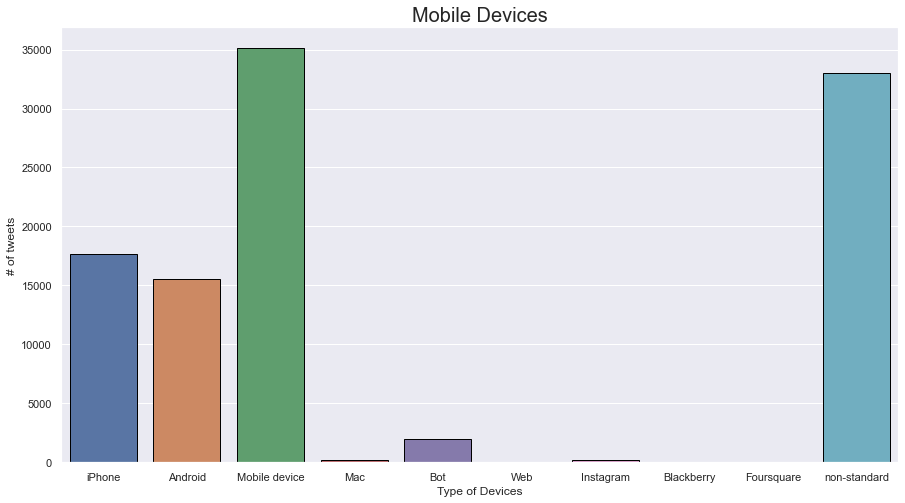

In [19]:
# Function to extract device from tweet text
def extract_device(source):
    # try / except, since not every data set has this attribute
    try:
        if 'iPhone' in source or ('iOS' in source):
            return 'iPhone'
        elif 'Android' in source:
            return 'Android'
        elif 'Mobile' in source or ('App' in source):
            return 'Mobile device'
        elif 'Mac' in source:
            return 'Mac'
        elif 'Windows' in source:
            return 'Windows'
        elif 'Bot' in source:
            return 'Bot'
        elif 'Web' in source:
            return 'Web'
        elif 'Instagram' in source:
            return 'Instagram'
        elif 'Blackberry' in source:
            return 'Blackberry'
        elif 'iPad' in source:
            return 'iPad'
        elif 'Foursquare' in source:
            return 'Foursquare'
        else:
            return 'non-standard'
    except:
        return '-'


df['device'] = df['source'].apply(extract_device)
df

# Now we will plot all the different categories.

len_list = [len(df[df['device'] == 'iPhone']), 
    len(df[df['device'] == 'Android']),
    len(df[df['device'] == 'Mobile device']),
    len(df[df['device'] == 'Mac']),
    len(df[df['device'] == 'Bot']),
    len(df[df['device'] == 'Web']),
    len(df[df['device'] == 'Instagram']),
    len(df[df['device'] == 'Blackberry']),
    len(df[df['device'] == 'Foursquare']),
    len(df[df['device'] == 'non-standard'])]

item_list = ['iPhone','Android', 'Mobile device', 'Mac', 'Bot', 'Web', 'Instagram', 'Blackberry', 'Foursquare', 'non-standard']
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
plt.title('Mobile Devices', fontsize = 20)
plt.xlabel('Type of Devices')
plt.ylabel('# of tweets')
sns.barplot(x = item_list, y = len_list,  edgecolor = 'black', linewidth=1)

plt.show()

In [20]:
# Commonising Hashtags
df['Hashtag'] = df['Hashtag'].str.replace('Evs','EVs')
df['Hashtag'] = df['Hashtag'].str.replace('Ev','EVs')
df['Hashtag'] = df['Hashtag'].str.replace('electricvehicles','ElectricVehicles')
df['Hashtag'] = df['Hashtag'].str.replace('Electricvehicles','ElectricVehicles')
df['Hashtag'] = df['Hashtag'].str.replace('autonomousvehicles','AutonomousVehicles')
df['Hashtag'] = df['Hashtag'].str.replace('Autonomousvehicles','AutonomousVehicles')
df['Hashtag'] = df['Hashtag'].str.replace('greenenergy','Greenenergy')
df['Hashtag'] = df['Hashtag'].str.replace('driveelectric','DriveElectric')
df['Hashtag'] = df['Hashtag'].str.replace('electriccar','Electriccars')

In [21]:
# frequency count of column Hashtag
df_hashtags = df['Hashtag'].value_counts()
print(df_hashtags)

EVs                    45695
ElectricVehicles       22575
Greenenergy             6918
AutonomousVehicles      6104
electric                5665
gogreen                 3749
Electriccars            2544
emobility                805
zeroemission             672
DriveElectric            422
electricmobility         106
goelectric                55
evtechnology               4
ecofriendlyvehicles        1
Name: Hashtag, dtype: int64


In [22]:
# Visualization of Top 25 Hashtags
labels = df_hashtags.head(25).index.values.tolist()
freq = df_hashtags.head(25).values.tolist()
index = np.arange(len(freq))

Among 105551 Tweets, 14 Hashtags were used.


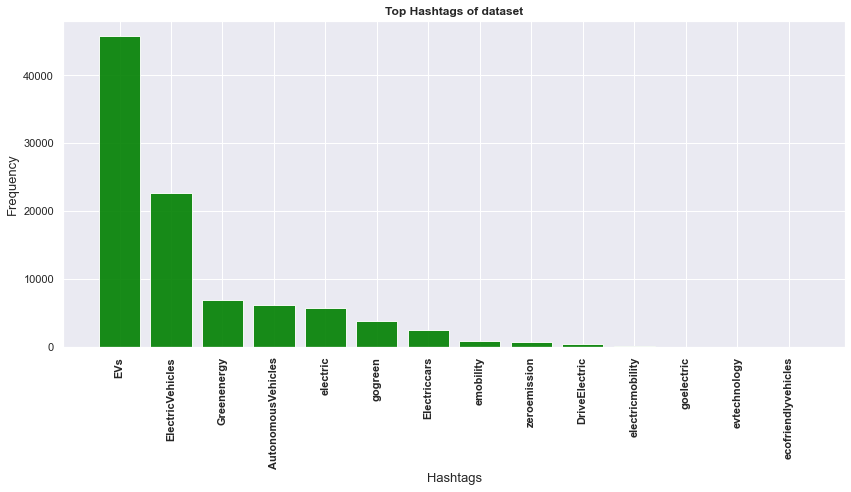

In [23]:
print("Among 105551 Tweets, 14 Hashtags were used.")
plt.figure(figsize=(14,6))
plt.bar(index, freq, alpha=0.9, color= 'green')
plt.xlabel('Hashtags', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, labels, fontsize=11, rotation=90, fontweight="bold") 
plt.title('Top Hashtags of dataset', fontsize=12, fontweight="bold")
plt.show()

# Top Hashtags by extraction

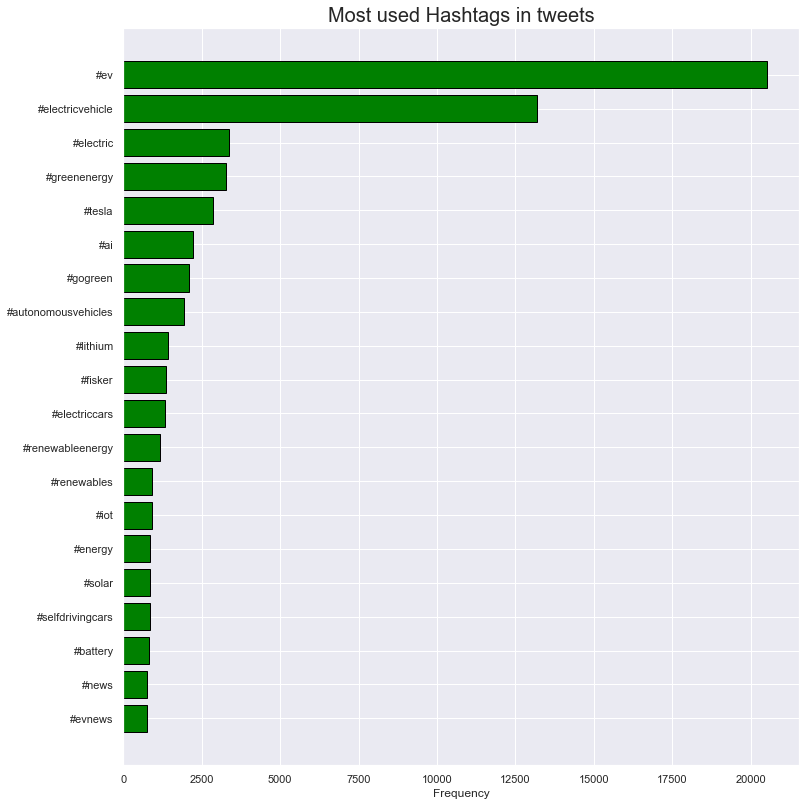

In [24]:
#To see the most used hashtags.
hashtags = []
hashtag_pattern = re.compile(r"#[a-zA-Z]+")
hashtag_matches = list(df['text'].apply(hashtag_pattern.findall))
hashtag_dict = {}

for match in hashtag_matches:
    for singlematch in match:
        if singlematch.casefold() not in hashtag_dict.keys():
            hashtag_dict[singlematch.casefold()] = 1
        else:
            hashtag_dict[singlematch.casefold()] = hashtag_dict[singlematch.casefold()]+1
            
#Making a list of the most used hashtags and their values
hashtag_ordered_list =sorted(hashtag_dict.items(), key=lambda x:x[1])
hashtag_ordered_list = hashtag_ordered_list[::-1]
#Separating the hashtags and their values into two different lists
hashtag_ordered_values = []
hashtag_ordered_keys = []

# Remove nulls
global ev_add_val, ev_f_add_val
ev_add_val=ev_f_add_val=0
hashtag_ordered_list = [list(i) for i in hashtag_ordered_list]
    

for tup_i, tup in enumerate(hashtag_ordered_list):
    if tup[0] == '#evs':
        ev_add_val = tup[1]
        hashtag_ordered_list.remove(['#evs', ev_add_val])
        
for tup_i, tup in enumerate(hashtag_ordered_list):
    if tup[0] == '#electricvehicles':
        ev_f_add_val = tup[1]
        hashtag_ordered_list.remove(['#electricvehicles', ev_f_add_val])

for tup_i, tup in enumerate(hashtag_ordered_list):
    if tup[0] == '#ev':
        hashtag_ordered_list[tup_i][1]+=ev_add_val
    if tup[0] == '#electricvehicle':
        hashtag_ordered_list[tup_i][1]+=ev_f_add_val
    
hashtag_ordered_list.sort(key = lambda x: x[1], reverse=True) 
        
#Pick the 20 most used hashtags to plot
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_keys.append(item[0])
    hashtag_ordered_values.append(item[1])
    
#Plotting a graph with the most used hashtags
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos ,list(hashtag_ordered_values)[::-1], align='center', color = 'green', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
ax.set_xlabel("Frequency")
ax.set_title("Most used Hashtags in tweets", fontsize = 20)
plt.tight_layout(pad=3)
plt.show()

In [25]:
df['user'] = df['user'].apply(eval)
# df_location = df['Location'].value_counts()
# print(df_location)
df['Location'] = df['user'].apply(lambda x: x['location'])
df['Location']



0                  London, England
1             Paris, Ile-de-France
2                                 
3                                 
4                                 
                    ...           
394253                          UK
394256                  California
394257                Richmond, CA
394258                      Global
394260    British Columbia, Canada
Name: Location, Length: 105551, dtype: object

In [26]:
from geopy.geocoders import Nominatim
import geopy
def get_loc(loc):
    geopy.geocoders.options.default_user_agent = "test_app1"
    geolocator = Nominatim(user_agent='test_app1')
    location = geolocator.geocode(loc, language='en')
    print(loc)
    try:
        print(location.raw)
        return location.raw['display_name'].split(',')[-1].strip()
    except:
        return None

In [27]:
df_temp = df[0:200]
df_temp['Loc_Country'] = df_temp['Location'].apply(get_loc)

London, England
{'place_id': 344385499, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 65606, 'boundingbox': ['51.2867601', '51.6918741', '-0.5103751', '0.3340155'], 'lat': '51.5073219', 'lon': '-0.1276474', 'display_name': 'London, Greater London, England, United Kingdom', 'class': 'place', 'type': 'city', 'importance': 1.0507827616237295, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_place_city.p.20.png'}
Paris, Ile-de-France
{'place_id': 297522875, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 7444, 'boundingbox': ['48.8155755', '48.902156', '2.224122', '2.4697602'], 'lat': '48.8588897', 'lon': '2.3200410217200766', 'display_name': 'Paris, Ile-de-France, Metropolitan France, France', 'class': 'boundary', 'type': 'administrative', 'importance': 1.2517101715588672, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_bo

UK, US, Global 
{'place_id': 148293533, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 179006263, 'boundingbox': ['22.3649877', '22.3660774', '114.1187676', '114.1198324'], 'lat': '22.3655534', 'lon': '114.11928570252064', 'display_name': 'Global Gateway, Tsuen Wan Town Centre, Tsuen Wan, Tsuen Wan District, New Territories, Hong Kong, China', 'class': 'landuse', 'type': 'industrial', 'importance': 0.3000099999999999}
Global Technology Company
{'place_id': 66302447, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'node', 'osm_id': 6058836586, 'boundingbox': ['36.2020258', '36.2021258', '44.0170734', '44.0171734'], 'lat': '36.2020758', 'lon': '44.0171234', 'display_name': 'Global Technology Company, طريق 60 متر, Tayrawa - 108, تەیراوە ١٠٨, Erbil Central Subdistrict, Erbil District, Erbil Governorate, Iraqi Kurdistan Region, 44000, Iraq', 'class': 'office', 'type': 'company


London, England
{'place_id': 344385499, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 65606, 'boundingbox': ['51.2867601', '51.6918741', '-0.5103751', '0.3340155'], 'lat': '51.5073219', 'lon': '-0.1276474', 'display_name': 'London, Greater London, England, United Kingdom', 'class': 'place', 'type': 'city', 'importance': 1.0507827616237295, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_place_city.p.20.png'}


New Delhi
{'place_id': 297772749, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 2763541, 'boundingbox': ['28.4812633', '28.6456842', '77.0503708', '77.2551392'], 'lat': '28.6138954', 'lon': '77.2090057', 'display_name': 'New Delhi, Delhi, India', 'class': 'boundary', 'type': 'administrative', 'importance': 0.8848043445414906, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_boundary_administrative.p.20.png'}
Lo

Mysore & 𝗕𝗘𝗥𝗟𝗶𝗡*
{'place_id': 18180697, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'node', 'osm_id': 2068274800, 'boundingbox': ['12.1451828', '12.4651828', '76.4953609', '76.8153609'], 'lat': '12.3051828', 'lon': '76.6553609', 'display_name': 'Mysuru, Mysuru taluk, Mysuru district, Karnataka, 570001, India', 'class': 'place', 'type': 'city', 'importance': 0.5316218962182455, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_place_city.p.20.png'}
Mysore & 𝗕𝗘𝗥𝗟𝗶𝗡*
{'place_id': 18180697, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'node', 'osm_id': 2068274800, 'boundingbox': ['12.1451828', '12.4651828', '76.4953609', '76.8153609'], 'lat': '12.3051828', 'lon': '76.6553609', 'display_name': 'Mysuru, Mysuru taluk, Mysuru district, Karnataka, 570001, India', 'class': 'place', 'type': 'city', 'importance': 0.5316218962182455, 'icon': 'https://nominatim.openstreetmap.org/ui/map


London, England
{'place_id': 344385499, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 65606, 'boundingbox': ['51.2867601', '51.6918741', '-0.5103751', '0.3340155'], 'lat': '51.5073219', 'lon': '-0.1276474', 'display_name': 'London, Greater London, England, United Kingdom', 'class': 'place', 'type': 'city', 'importance': 1.0507827616237295, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_place_city.p.20.png'}

Paris, Ile-de-France
{'place_id': 297522875, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 7444, 'boundingbox': ['48.8155755', '48.902156', '2.224122', '2.4697602'], 'lat': '48.8588897', 'lon': '2.3200410217200766', 'display_name': 'Paris, Ile-de-France, Metropolitan France, France', 'class': 'boundary', 'type': 'administrative', 'importance': 1.2517101715588672, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_

San Francisco, CA
{'place_id': 297054975, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 111968, 'boundingbox': ['37.6403143', '37.929811', '-123.173825', '-122.281479'], 'lat': '37.7790262', 'lon': '-122.419906', 'display_name': 'San Francisco, CAL Fire Northern Region, California, United States', 'class': 'boundary', 'type': 'administrative', 'importance': 1.0251309463713039, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_boundary_administrative.p.20.png'}
London, England
{'place_id': 344385499, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 65606, 'boundingbox': ['51.2867601', '51.6918741', '-0.5103751', '0.3340155'], 'lat': '51.5073219', 'lon': '-0.1276474', 'display_name': 'London, Greater London, England, United Kingdom', 'class': 'place', 'type': 'city', 'importance': 1.0507827616237295, 'icon': 'https://nominatim.openstree


WORLD CITIZEN💙NO DM ZONE 
Genova Italy
{'place_id': 346053530, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 44875, 'boundingbox': ['44.3784709', '44.5198419', '8.6657444', '9.0955805'], 'lat': '44.40726', 'lon': '8.9338624', 'display_name': 'Genoa, Liguria, Italy', 'class': 'boundary', 'type': 'administrative', 'importance': 0.7921779665930816, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_boundary_administrative.p.20.png'}

India
{'place_id': 297491427, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 304716, 'boundingbox': ['6.5531169', '35.6745457', '67.9544415', '97.395561'], 'lat': '22.3511148', 'lon': '78.6677428', 'display_name': 'India', 'class': 'boundary', 'type': 'administrative', 'importance': 0.957689135880987, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_boundary_administrative.p.20.png'}


Paris, I

Oklahoma City, OK
{'place_id': 342311556, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 185048, 'boundingbox': ['35.290695', '35.674752', '-97.830948', '-97.124718'], 'lat': '35.4729886', 'lon': '-97.5170536', 'display_name': 'Oklahoma City, Oklahoma County, Oklahoma, United States', 'class': 'boundary', 'type': 'administrative', 'importance': 0.9396724306778383, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_boundary_administrative.p.20.png'}
Miami, FL USA
{'place_id': 298230806, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 1216769, 'boundingbox': ['25.7090517', '25.8557827', '-80.31976', '-80.139157'], 'lat': '25.7741728', 'lon': '-80.19362', 'display_name': 'Miami, Miami-Dade County, Florida, United States', 'class': 'boundary', 'type': 'administrative', 'importance': 0.885448824339033, 'icon': 'https://nominatim.openstreetm

Frankfurt, Germany
{'place_id': 297878293, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 62400, 'boundingbox': ['50.0153529', '50.2271424', '8.4727605', '8.8004049'], 'lat': '50.1106444', 'lon': '8.6820917', 'display_name': 'Frankfurt, Hesse, Germany', 'class': 'boundary', 'type': 'administrative', 'importance': 0.9141325622496304, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_boundary_administrative.p.20.png'}
Internet
{'place_id': 192622309, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 374437073, 'boundingbox': ['19.3721285', '19.3722489', '-72.3347764', '-72.3345291'], 'lat': '19.37218875', 'lon': '-72.33465445105234', 'display_name': "Internet, 3e Bas de Sault, Saint Michel de l’Attalaye, Commune de Saint Michel de l'Attalaye, Arrondissement de Marmelade, Artibonite Department, Haiti", 'class': 'landuse', 'type': 'commercial', 

C:\Users\thanigav\AppData\Local\Temp/ipykernel_21264/3542891823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Loc_Country'] = df_temp['Location'].apply(get_loc)


In [28]:
df_temp

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status_id_str,quoted_status,extended_entities,withheld_scope,withheld_in_countries,Hashtag,tidy_tweet,device,Location,Loc_Country
0,Mon Dec 05 14:14:43 +0000 2022,1599769240004972544,1599769240004972544,RT @iot_automotive: 24h round-up. A collection...,False,"{'hashtags': [{'text': 'AI', 'indices': [95, 9...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,AutonomousVehicles,rt : 24h round-up. a collection of top tweets....,non-standard,"London, England",United Kingdom
1,Mon Dec 05 14:00:55 +0000 2022,1599765764113940483,1599765764113940483,Meet Powderworld: A Lightweight Simulation Env...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://buffer.com"" rel=""nofollow"">Bu...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,AutonomousVehicles,meet powderworld: a lightweight simulation env...,non-standard,"Paris, Ile-de-France",France
2,Mon Dec 05 14:00:04 +0000 2022,1599765552154775557,1599765552154775557,RT @GothamVirtual: #vr #vrgotham #3dvideomotio...,False,"{'hashtags': [{'text': 'vr', 'indices': [19, 2...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://robotconsumer.com/"" rel=""nofol...",NaN,NaN,...,1.599754e+18,NaN,NaN,NaN,NaN,AutonomousVehicles,rt : #vr #vrgotham #3dvideomotion this researc...,non-standard,,None
3,Mon Dec 05 14:00:04 +0000 2022,1599765551378845697,1599765551378845697,RT @lidarnews: This research paper investigate...,False,"{'hashtags': [{'text': 'lidar', 'indices': [74...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://robotconsumer.com/"" rel=""nofol...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,AutonomousVehicles,rt : this research paper investigates the use ...,non-standard,,None
4,Mon Dec 05 14:00:04 +0000 2022,1599765550544130048,1599765550544130048,RT @guidaautonoma: American drivers are more l...,False,"{'hashtags': [{'text': 'autonomous', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://robotconsumer.com/"" rel=""nofol...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,AutonomousVehicles,rt : american drivers are more likely to a see...,non-standard,,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,Sat Dec 03 17:56:58 +0000 2022,1599100394587553792,1599100394587553792,Great to be a part of the experiment at @Pearl...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,AutonomousVehicles,great to be a part of the experiment at with ...,iPhone,"London, England",United Kingdom
382,Sat Dec 03 17:50:01 +0000 2022,1599098646363979777,1599098646363979777,RT @guidaautonoma: #AutonomousVehicles of the ...,False,"{'hashtags': [{'text': 'AutonomousVehicles', '...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,AutonomousVehicles,rt : #autonomousvehicles of the week \n1️⃣ yea...,Android,France Bretagne Quimper,France
383,Sat Dec 03 17:48:07 +0000 2022,1599098165487337472,1599098165487337472,RT @guidaautonoma: .@Waymo new mobility platfo...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,AutonomousVehicles,rt : . new mobility platform\n\n …,Android,France Bretagne Quimper,France
384,Sat Dec 03 17:44:50 +0000 2022,1599097340031225856,1599097340031225856,#Mercedes #driverless parking approved for com...,True,"{'hashtags': [{'text': 'Mercedes', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,

In [29]:
df_location = df_temp['Loc_Country'].value_counts()
print(df_location)

United States     31
France            29
India             22
Italy             17
United Kingdom    12
Mexico             4
Germany            3
Nepal              3
Canada             3
Spain              2
China              2
Netherlands        2
Turkey             1
Israel             1
Ethiopia           1
Cameroon           1
Belgium            1
Iraq               1
Sri Lanka          1
Haiti              1
Name: Loc_Country, dtype: int64


In [30]:
# Visualization of Top 25 location
labels1 = df_location.head(25).index.values.tolist()
freq1 = df_location.head(25).values.tolist()
index = np.arange(len(freq1))

Among 105551 Tweets, top locations are


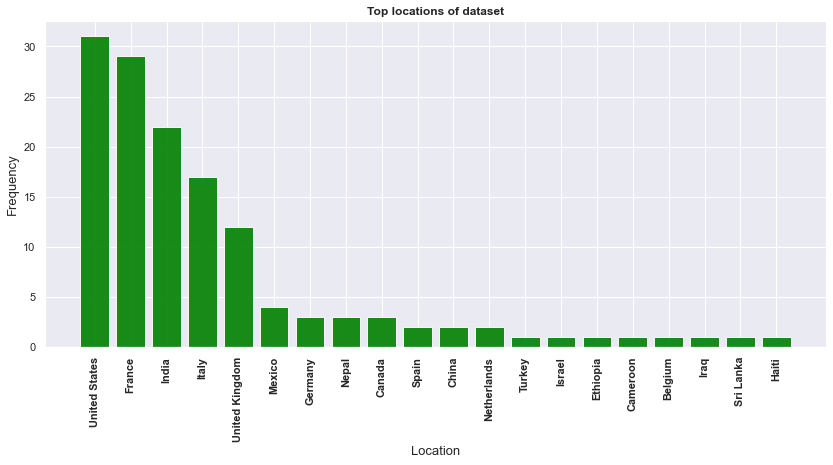

In [31]:
print("Among 105551 Tweets, top locations are")
plt.figure(figsize=(14,6))
plt.bar(index, freq1, alpha=0.9, color= 'green')
plt.xlabel('Location', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, labels1, fontsize=11, rotation=90, fontweight="bold") 
plt.title('Top locations of dataset', fontsize=12, fontweight="bold")
plt.show()

# Emojis

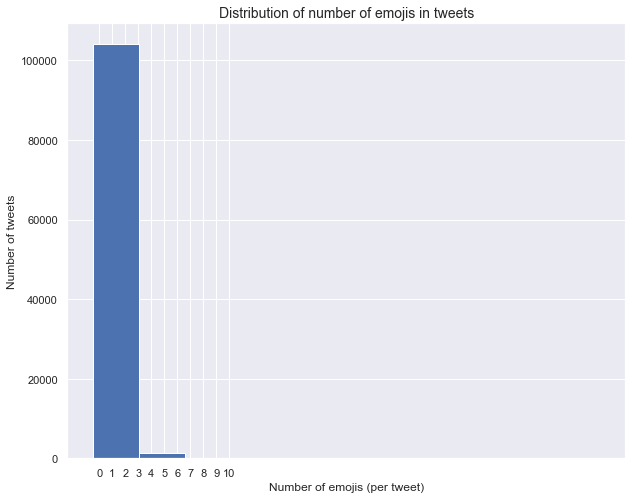

10725 8845
The percentage of emoji among all characters is 0.08%.

And the percentage of emoji among all words is: 0.57%

2107331


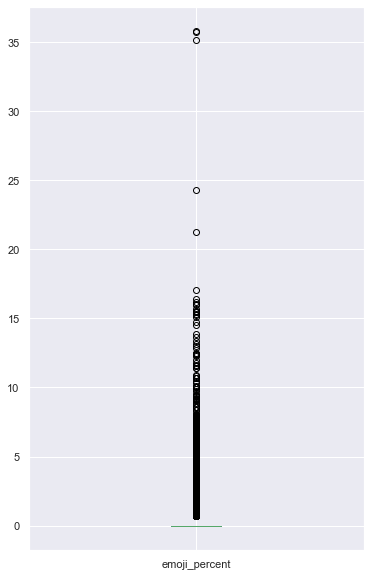

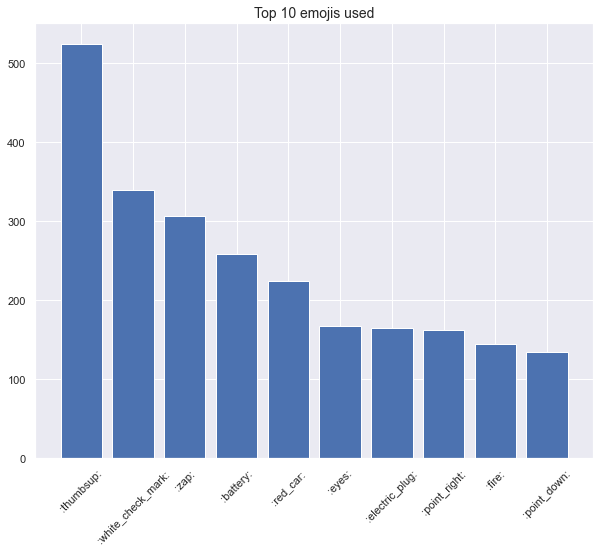

The decoded emojis are ['👍', '✅', '⚡', '🔋', '🚗', '👀', '🔌', '👉', '🔥', '👇']


,emoji,freq,decoded
0,👍,524,:thumbsup:
1,✅,339,:white_check_mark:
2,⚡,306,:zap:
3,🔋,258,:battery:
4,🚗,224,:red_car:
5,👀,167,:eyes:
6,🔌,164,:electric_plug:
7,👉,162,:point_right:
8,🔥,144,:fire:
9,👇,134,:point_down:


In [32]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import emoji
import itertools  

def tokenizer(text):
    tokens = nltk.word_tokenize(text)
    return tokens

df['text_tokenized'] = df['text'].apply(tokenizer)
df['text_tokenized']

#count emoji
#function to check if sth is an emoji
def char_is_emoji(character):
    return character in emoji.UNICODE_EMOJI['en']

#function to count emoji
def emoji_counter(text_string):
    try:
        count = 0
        for x in text_string:
            a = char_is_emoji(x)
            if a ==True:
                count+=1
    except error as e:
        print(e)
    return count


df['emoji_count'] = df['text'].apply(emoji_counter)

#plot distribution of emoji count
plt.figure(figsize=(10,8))

_ = plt.hist(df['emoji_count'], bins=11)

#set ticks
plt.xticks(np.arange(11)+0.5, np.arange(0,11,1))

#set title & labels
plt.title("Distribution of number of emojis in tweets", fontsize=14)
plt.ylabel("Number of tweets")
plt.xlabel("Number of emojis (per tweet)")
plt.show()


import emojis
for row in df['text']:
    c = emojis.count(row)


#convert series to string 
text_corpus_tk = df['text_tokenized'].to_string()
text_corpus= df['text'].to_string()


#sum all emojis
emoji_sum = emojis.count(text_corpus)
emoji_sum_tk = emojis.count(text_corpus_tk)

print(emoji_sum, emoji_sum_tk)

#function to count words
def word_count(string):
    split = string.split()
    count = len(split)
    return count

#create a column with word count
df['word_count'] = df['text'].apply(word_count)

#character count
df['character_count'] = [len(each) for each in df['text']]

#total number of characters
sum_of_characters = df['character_count'].sum()
sum_of_words = df['word_count'].sum()

#function to count words
def word_count(string):
    split = string.split()
    count = len(split)
    return count

#create a column with word count
df['word_count'] = df['text'].apply(word_count)

#character count
df['character_count'] = [len(each) for each in df['text']]

#total number of characters
sum_of_characters = df['character_count'].sum()
sum_of_words = df['word_count'].sum()

print(f'''The percentage of emoji among all characters is {round((emoji_sum/sum_of_characters)*100,2)}%.
\nAnd the percentage of emoji among all words is: {round((emoji_sum/sum_of_words)*100,2)}%
''')

df['emoji_percent'] = (df['emoji_count']/df['character_count'])*100

plt.figure(figsize=(6,10))
_ = df['emoji_percent'].plot.box()




from nltk.corpus import stopwords
from collections import Counter

#create a corpus
#remove stopwords
stop_words = set(stopwords.words('english'))

words_filtered = []

for row in df['text_tokenized']:
    for w in row:
        if w not in stop_words:
            words_filtered.append(w)
            
print(len(words_filtered))
c = Counter(words_filtered)

#return most common
c.most_common(10)


#turn counter into a dictionary
d_c = dict(c)

#list all emojis found in the counter
emoji_list = []
for item in d_c:
    if char_is_emoji(item):
        emoji_list.append(item)
        
#start a new dictinary for the frequency of emojis
emoji_dict = {}

for emoji_i in d_c:
    v = c[emoji_i]
    if emoji_i in emoji_list:
        emoji_dict[emoji_i] = v


#sort the emoji by frequency
sorted_emojis = {key: value for key, value in sorted(emoji_dict.items(), key=lambda item: item[1], reverse=True)}


#get top 30 values
import itertools
top_30_emoji = dict(itertools.islice(sorted_emojis.items(), 30))
top_30_emoji_series=pd.Series(top_30_emoji)

e_list =[]
for each in top_30_emoji_series.index:
    e = emojis.decode(each)
    e_list.append(e)
    
e_df = pd.DataFrame({'emoji':top_30_emoji_series.index, 'freq': top_30_emoji_series.values})
e_df['decoded']= e_list

#create function to plot a chosen number of top emoji
def plot_top_emoji(number):
    #get top 'number' values
    top_emoji = dict(itertools.islice(sorted_emojis.items(), number))
    
    #convert into a series
    top_emoji_series=pd.Series(top_emoji)
    
    #create a list of decoded emojis
    e_list =[]
    for each in top_emoji_series.index:
        e = emojis.decode(each)
        e_list.append(e)
    
    #convert into a df and append a list of decoded emojis
    e_df = pd.DataFrame({'emoji':top_emoji_series.index, 'freq': top_emoji_series.values})
    e_df['decoded']= e_list
    
    #plot
    symbols = e_df['decoded']
    values = e_df['freq']

    fig = plt.figure(figsize=(10,8))
    _ = plt.bar(symbols, height= values)
    
    #format title and labels
    title = f"Top {number} emojis used"
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45)
    plt.show()
    
    print("The decoded emojis are", list(top_emoji_series.index))
    
plot_top_emoji(10)

e_df

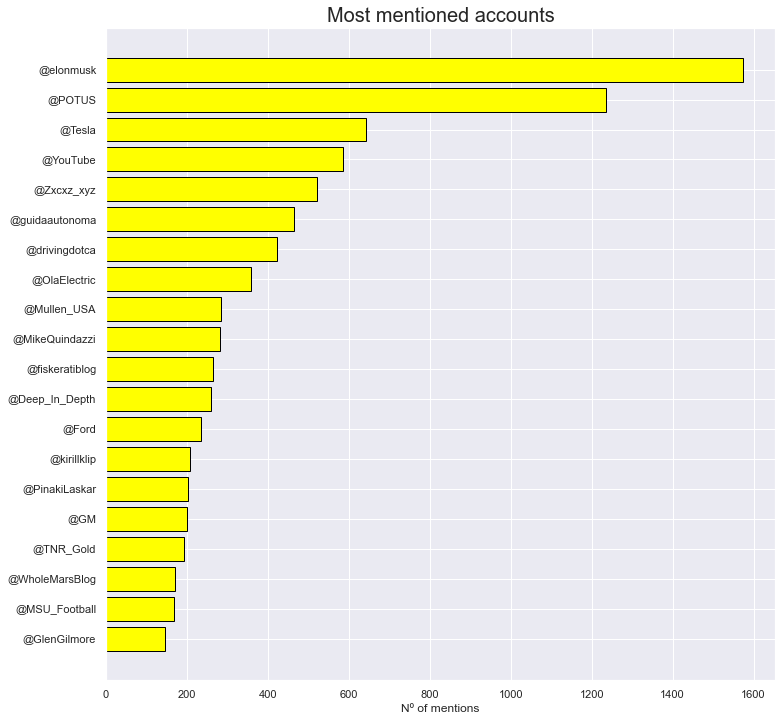

In [33]:
#Now we will do the same with the mentions:
mentions = []
mention_pattern = re.compile(r"@[a-zA-Z_]+")
mention_matches = list(df['text'].apply(mention_pattern.findall))
mentions_dict = {}
for match in mention_matches:
    for singlematch in match:
        if singlematch not in mentions_dict.keys():
            mentions_dict[singlematch] = 1
        else:
            mentions_dict[singlematch] = mentions_dict[singlematch]+1
            
#Create an ordered list of tuples with the most mentioned users and #the number of times they have been mentioned
mentions_ordered_list =sorted(mentions_dict.items(), key=lambda x:x[1])
mentions_ordered_list = mentions_ordered_list[::-1]
#Pick the 20 top mentioned users to plot and separate the previous #list into two list: one with the users and one with the values
mentions_ordered_values = []
mentions_ordered_keys = []
for item in mentions_ordered_list[0:20]:
    mentions_ordered_keys.append(item[0])
    mentions_ordered_values.append(item[1])
    
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(mentions_ordered_values))
ax.barh(y_pos ,list(mentions_ordered_values)[::-1], align='center', color = 'yellow', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos )
ax.set_yticklabels(list(mentions_ordered_keys)[::-1])
ax.set_xlabel("Nº of mentions")
ax.set_title("Most mentioned accounts", fontsize = 20)

plt.show()

In [34]:
df.to_csv('testing_mentions.csv')

In [35]:
def remove_hashtags(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    
    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

In [36]:
df['tidy_tweet'] = np.vectorize(remove_hashtags)(df['tidy_tweet'], "# [\w]*", "#[\w]*")

In [37]:
# remove link

def remove_links(tweet):
    tweet_no_link = re.sub(r"http\S+", "", tweet)
    return tweet_no_link

In [38]:
df['tidy_tweet'] = np.vectorize(remove_links)(df['tidy_tweet'])

In [39]:
# remove special characters


df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

C:\Users\thanigav\AppData\Local\Temp/ipykernel_21264/4084897529.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


In [40]:
# remove short words


df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [41]:
# Tokenize words and clean-up Punctuations

def tokenize(tweet):
    for word in tweet:
        yield(gensim.utils.simple_preprocess(str(word), deacc=True))  # deacc=True Removes punctuations

In [42]:
df['tidy_tweet_tokens'] = list(tokenize(df['tidy_tweet']))

In [43]:
# Remove Stopwords

# Prepare Stop Words
stop_words = stopwords.words('english')
stop_words.extend(['from', 'https', 'twitter', 'religions', 'pic','twitt',])

In [44]:
def remove_stopwords(tweets):
    return [[word for word in simple_preprocess(str(tweet)) if word not in stop_words] for tweet in tweets]

In [45]:
df['tokens_no_stop'] = remove_stopwords(df['tidy_tweet_tokens'])

In [46]:
# drop tweets less than 3 tokens

df['length'] = df['tokens_no_stop'].apply(len)
df = df.drop(df[df['length']<3].index)

In [47]:
df = df.drop(['length'], axis=1)
df.shape

(98727, 43)

In [48]:
df.reset_index(drop=True, inplace=True)

In [49]:
# WordCloud

# Join the tweet back together
def rejoin_words(row):
    words = row['tokens_no_stop']
    joined_words = (" ".join(words))
    return joined_words

In [50]:
df['no_stop_joined'] = df.apply(rejoin_words, axis=1)

In [51]:
all_words = ' '.join([text for text in df['no_stop_joined']])

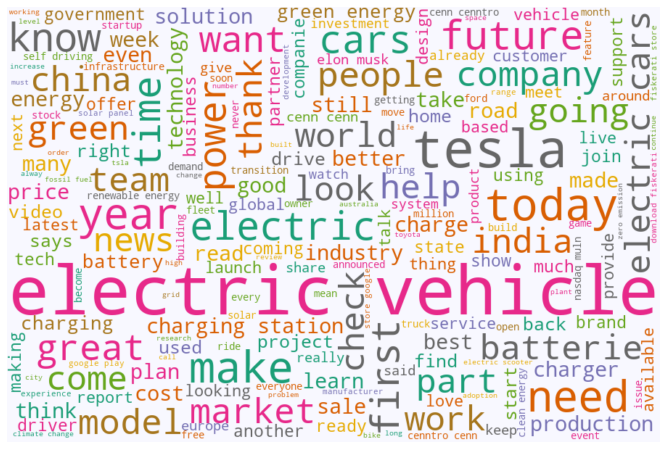

In [52]:
wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=110, background_color='ghostwhite', 
                      max_words=200,colormap='Dark2').generate(all_words)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [53]:
# Cleaning Effects - Length of tweets

df["tweet_length"] = df["text"].str.len()
df["cleaned_tweet_length"] = df["no_stop_joined"].str.len()
df_lengths = df[['tweet_length', 'cleaned_tweet_length']]

c:\users\thanigav\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\thanigav\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


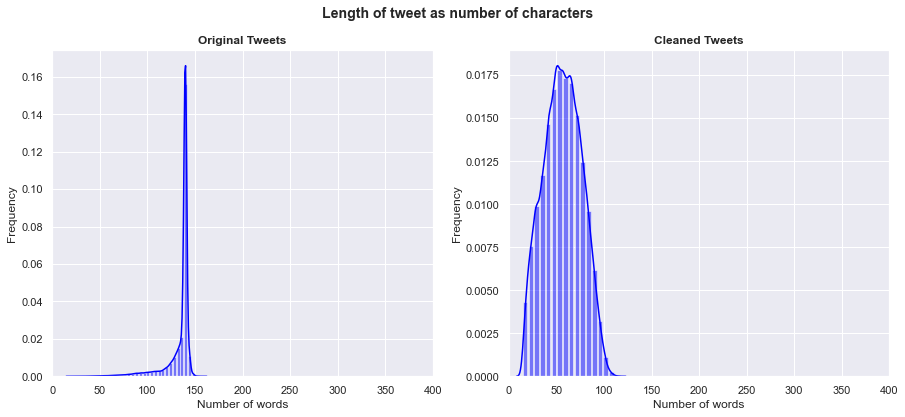

In [54]:
x1 = df_lengths.tweet_length
x2 = df_lengths.cleaned_tweet_length
plt.figure(figsize=(15,6))
plt.suptitle('Length of tweet as number of characters', fontsize=14, fontweight="bold")
plt.subplot(1,2,1)
sns.distplot(x1, color="blue", label="No. Words", bins=35, hist_kws={"alpha": 0.5,"rwidth":0.8})
plt.title("Original Tweets",fontsize=12, fontweight="bold")
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,400])

# Chart 2: Derivative Function
plt.subplot(1,2,2)
sns.distplot(x2, color="blue", label="No. Words", bins=17, hist_kws={"alpha": 0.5, "rwidth":0.8})
plt.title("Cleaned Tweets",fontsize=12, fontweight="bold")
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,400])

plt.show()

In [55]:
# Cleaning Effects - Number of Words

df["tweet_words"] = df['text'].str.split().str.len()
df["cleaned_tweet_words"] = df["no_stop_joined"].str.split().str.len()
df_lengths = df[['tweet_words', 'cleaned_tweet_words']]

c:\users\thanigav\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\thanigav\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


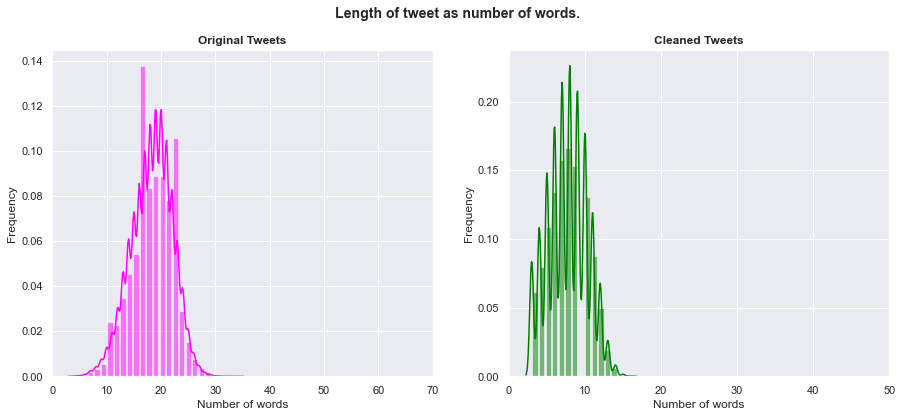

In [56]:
x_1 = df_lengths.tweet_words
x_2 = df_lengths.cleaned_tweet_words
plt.figure(figsize=(15,6))
plt.suptitle('Length of tweet as number of words.', fontsize=14, fontweight="bold")
plt.subplot(1,2,1)
sns.distplot(x_1, color="Magenta", label="No. Words", bins=25, hist_kws={"alpha": 0.5,"rwidth":0.8})
plt.title("Original Tweets",fontsize=12, fontweight="bold")
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,70])

# Chart 2: Derivative Function
plt.subplot(1,2,2)
sns.distplot(x_2, color="Green", label="No. Words", bins=15, hist_kws={"alpha": 0.5, "rwidth":0.8})
plt.title("Cleaned Tweets",fontsize=12, fontweight="bold")
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,50])

plt.show()

In [57]:
df = df.drop(['tweet_length', 'cleaned_tweet_length', 'tweet_words', 'cleaned_tweet_words'], axis=1)

In [58]:
# Top 25 Most frequent Words

word_freq = pd.Series(np.concatenate([x.split() for x in df.no_stop_joined])).value_counts()

In [59]:
word_df = pd.Series.to_frame(word_freq)
word_df['word'] = list(word_df.index)
word_df.reset_index(drop=True, inplace=True)
word_df.columns = ['freq', 'word']

Unique words: 36962


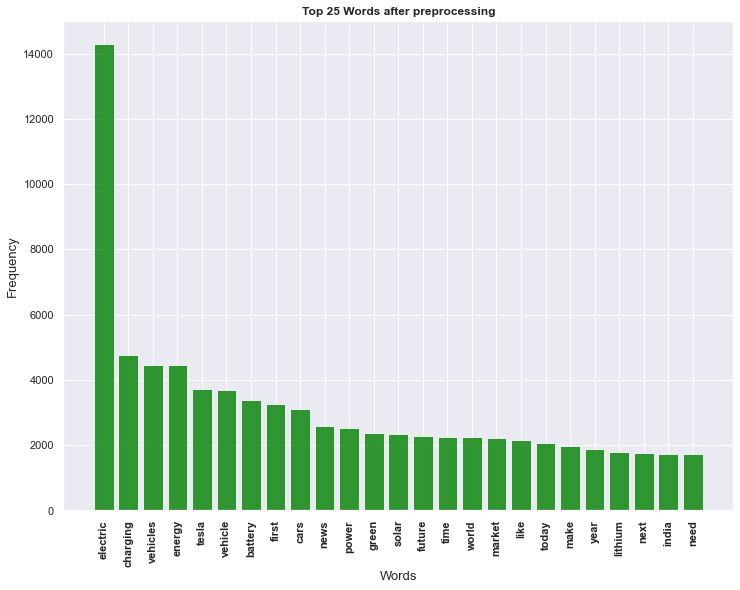

In [60]:
label = word_df['word'].head(25)
freq = word_df['freq'].head(25)
index = np.arange(len(freq))

print("Unique words:", len(word_df))
plt.figure(figsize=(12,9))
plt.bar(index, freq, alpha=0.8, color= 'green')
plt.xlabel('Words', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, label, fontsize=11, rotation=90, fontweight="bold") 
plt.title('Top Words after preprocessing', fontsize=12, fontweight="bold")
plt.show()

In [61]:
#to csv
df.to_csv('./pre-processed.csv')

In [62]:
# save model 
df.to_pickle('./pre-processed.pkl')

In [63]:
# continue to Topic modeling